## Happy Deliveries Project

In [8]:
# UPLOAD P1: DATASETS & LIBRARIES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

delivery = pd.read_csv("C:/Users/yaelg/OneDrive/Documents/WAIA/week 7/hd_orders.csv")
customer = pd.read_excel("C:/Users/yaelg/OneDrive/Documents/WAIA/week 7/hd_customers.xlsx")
print(delivery.head())

   order_id   order_timestamp delivered_timestamp  driver_id  restaurant_id  \
0    100001  26/11/2021 18:22    26/11/2021 18:49        273            105   
1    100002  11/07/2021 21:23    11/07/2021 21:53         43            219   
2    100003  27/04/2021 17:28    27/04/2021 17:55        299             48   
3    100004  22/02/2021 18:08    22/02/2021 18:35        320            233   
4    100005  21/06/2021 18:14    21/06/2021 18:44         41            207   

   cust_id delivery_region  discount_applied  discount_code  order_total  \
0     1016          Dublin              True  BLACKFRIDAY21        69.46   
1     1017            Cork             False            NaN        69.40   
2     1019          Dublin             False            NaN        47.16   
3     1020          Dublin             False            NaN        47.15   
4     1024          Dublin             False            NaN        47.00   

   discount_pc     status  
0         20.0  COMPLETED  
1          N

In [4]:
# CLEAN DATASET CUSTOMER
# LOOK FOR INPUT ERRORS
customer['age'].describe()



count    406.000000
mean      29.354680
std       14.347274
min        6.000000
25%       22.000000
50%       26.000000
75%       31.000000
max      160.000000
Name: age, dtype: float64

In [5]:
#There seems to be a problem with the ages
old=customer[customer['age']>100]
young=customer[customer['age']<18]
print(old,young)



      id first_name  last_name  age    city                        email
0   1001     Samuel     Zavala  139  Dublin  Zavala_Samuel46@xfinity.com
30  1031    Jessica  Hendricks  150  Dublin      Jessica.H85@xfinity.com
70  1071      David     Gibson  160  Dublin      DavidGibson@xfinity.com        id   first_name last_name  age       city  \
59   1060          Amy    Farmer    8      Kerry   
102  1103       Andrew     Craig    6     Dublin   
164  1165  Christopher    Ramsey    6  Waterford   

                              email  
59           Farmer.Amy@verizon.com  
102            Andrew.C74@yahoo.com  
164  Ramsey_Christopher@hotmail.com  


In [6]:
#Because there are 406 entries removing these
customer=customer.drop(old.index).drop(young.index)

In [7]:
# Calculating the order total after discount and adding it as a new column to the delivery data
delivery['discount_pc']=delivery['discount_pc'].fillna(0)
delivery['total_after_discount']=delivery['order_total']*(1-delivery['discount_pc']/100)


In [8]:
# Delete ordered that were cancelled

delivery=delivery[delivery['status']=='COMPLETED']



TASK 1
Compare monthly 2021 sales to 2022 and determine has ‘Happy Deliveries’
sales grown.

year
2021    10417.279
2022    16000.005
Name: total_after_discount, dtype: float64

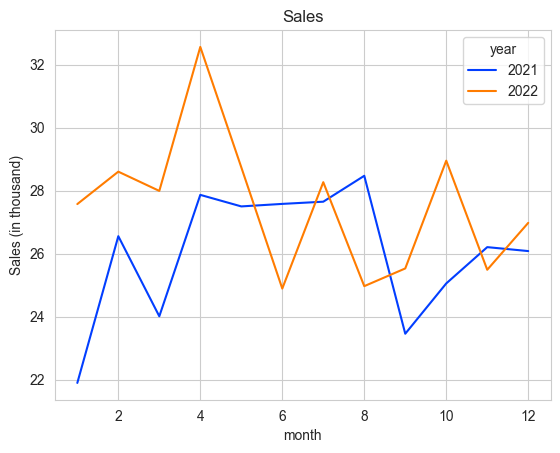

In [11]:
pd.options.mode.chained_assignment = None
#Convert dates to datetime format

delivery['order_timestamp'] = pd.to_datetime(delivery['order_timestamp'],dayfirst=True)
delivery['delivered_timestamp'] = pd.to_datetime(delivery['delivered_timestamp'],dayfirst=True)

#get month and year
delivery['year'] = delivery["order_timestamp"].dt.year
delivery['month'] =delivery["order_timestamp"].dt.month


#Plot
sns.set_style("whitegrid")
g=sns.lineplot(data=delivery,x='month',y='total_after_discount',hue='year',palette='bright',errorbar=None)
g.set(title='Sales',ylabel='Sales (in thousand)')

#total sales
total=delivery.groupby('year')['total_after_discount'].sum()
total

TASK 2
Looking to the loyalty card holders, what is the age distribution of those
customers?

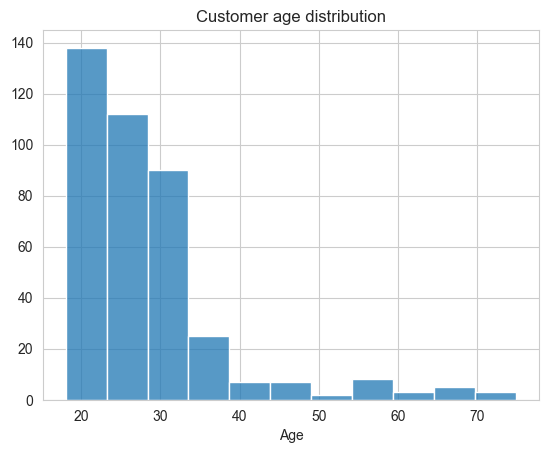

In [12]:
g=sns.histplot(data=customer,x='age',binwidth=5)
g.set(title='Customer age distribution',ylabel='',xlabel='Age')
plt.show()

The plot shows that most of the customers are between 18 to 35 years old.

TASK 3 Is there a relationship between the amount spend by a loyalty card holder and
their age?

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Order total')]

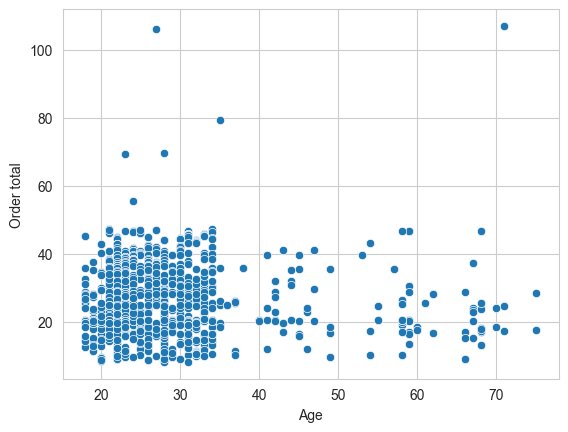

In [13]:
happy_deliveries=customer.merge(delivery, right_on='cust_id',left_on='id')
g=sns.scatterplot(data=happy_deliveries,x='age',y='total_after_discount')
g.set(xlabel='Age',ylabel='Order total')

The scatterplot doesn't show a relationship between Age and amount spent.

In [ ]:
TASK 4 Is there a relationship between the amount of a payment, the age of a person
and whether or not they used discount codes?

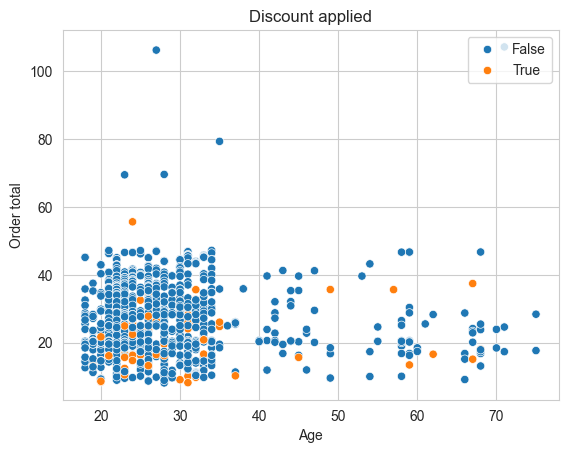

In [14]:
g=sns.scatterplot(data=happy_deliveries,x='age',y='total_after_discount',hue='discount_applied')
plt.legend(loc='upper right')
g.set(title='Discount applied',xlabel='Age',ylabel='Order total')
plt.show()

TASK 5 Compare the sales for 2022 across all regions.

[Text(0.5, 1.0, 'Sales by region'),
 Text(0.5, 0, 'Delivery Region 2022'),
 Text(0, 0.5, 'Total Sales (in thousand Euro)')]

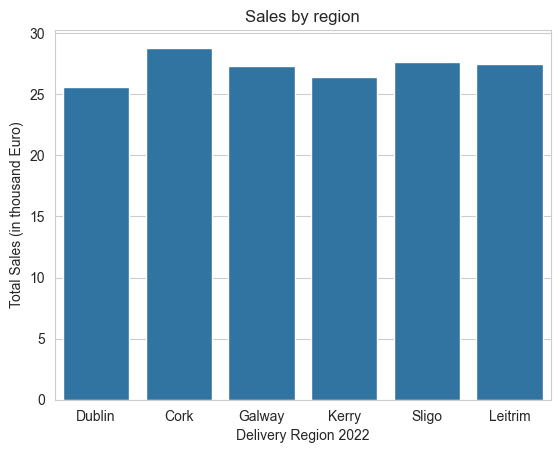

In [15]:
happy_deliveries_2022=happy_deliveries[happy_deliveries['year']==2022]

g=sns.barplot(data=happy_deliveries_2022,x='delivery_region',y='total_after_discount',errorbar=None)
g.set(title='Sales by region',xlabel='Delivery Region 2022',ylabel='Total Sales (in thousand Euro)')

TASK 6 
Christmas is coming and Happy Deliveries want to reward their high spending
customers. Who are the top 10 highest spending customers in 2022?
Find their ID, name and email address for the marketing department to
contact them with a reward.

In [16]:
high_spending=happy_deliveries_2022.groupby('id')['total_after_discount'].sum().sort_values(ascending=False).head(10).index
high_spending_customers=happy_deliveries_2022[happy_deliveries_2022['id'].isin(high_spending)]
high_spending_customers=high_spending_customers.drop_duplicates(subset='id')
high_spending_customers=high_spending_customers[['id','first_name','last_name','email']]
display(high_spending_customers)


,id,first_name,last_name,email
19,1009,Sheri,Aguilar,Aguilar.Sheri22@att.com
58,1018,David,Snyder,David.S@hotmail.com
74,1021,Joshua,Kidd,Joshua_K@att.com
82,1023,Gabrielle,Morgan,GMorgan48@mail.com
103,1027,Jason,Dudley,Jason_D@zoho.com
112,1028,David,Murphy,Murphy.David@mail.com
120,1029,Meagan,Gonzalez,Gonzalez_Meagan43@mail.com
231,1059,Brent,Harrell,Harrell.Brent13@protonmail.com
399,1126,Deanna,Knight,DeannaKnight@protonmail.com
590,1227,Andrew,Cantu,Andrew_Cantu@yandex.com


TASK 7
In order to keep up with the anticipated increase in sales over Christmas,
Happy Deliveries want to find what are the top 3 restaurants, so they can
allocate their resources more efficiently. What are the top 3 restaurants in
terms of sales for 2022?
Find their name, and total sales

In [22]:
top_restaurants=happy_deliveries_2022.groupby('restaurant_id')['total_after_discount'].sum().sort_values(ascending=False).head(10)
display(top_restaurants)

restaurant_id
9      671.894
107    638.422
8      564.360
20     523.216
68     439.228
6      326.680
63     305.002
98     281.420
205    250.360
84     241.576
Name: total_after_discount, dtype: float64

TASK 8
The marketing department wants to reach out to non-returning loyalty card
customers from 2021 in hopes they can lower their customer churn rate. Find
all the customers who are considered non-returning including their id, name
and email.

In [59]:
happy_deliveries_2021=happy_deliveries[happy_deliveries['year']==2021]

non_returning=happy_deliveries_2021.groupby('id').filter(lambda id:len(id)==1)


non_returning_customers=non_returning[['id','first_name','last_name','email']]
display(non_returning_customers)


,id,first_name,last_name,email
18,1009,Sheri,Aguilar,Aguilar.Sheri22@att.com
21,1010,John,Anderson,Anderson_John67@yandex.com
25,1011,Kevin,Blankenship,Kevin.B@gmail.com
29,1012,Lance,Lopez,LLopez@verizon.com
39,1014,Kyle,Singh,Singh_Kyle@hotmail.com
...,...,...,...,...
967,1402,Sheila,Gibson,Gibson.Sheila@gmail.com
968,1403,Julie,Thomas,JThomas@mail.com
969,1404,Sarah,Juarez,SJuarez71@verizon.com
970,1405,Tony,Richardson,Richardson.Tony@yandex.com


In [66]:
#question: should i consider if the customers have returned in 2022?
#customers that also didnt return in 2022
happy_deliveries_2022=happy_deliveries[happy_deliveries['year']==2022]

non_returning_customers_2022=happy_deliveries_2022[happy_deliveries_2022['id'].isin(non_returning)]

display(non_returning_customers_2022)

#non of the non returning customers of 2021 returned in 2022

,id,first_name,last_name,age,city,email,order_id,order_timestamp,delivered_timestamp,driver_id,...,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,total_after_discount,year,month


In [ ]:
TASK 9
The sales team want to find out if the discount code ‘BLACKFRIDAY22’ was
as successful as last years ‘BLACKFRIDAY21’. Find the total amount of sales
from both discount codes.

In [169]:
bf_21 = (happy_deliveries_2021['discount_code'].values == 'BLACKFRIDAY21').sum()
bf_22 = (happy_deliveries_2022['discount_code'].values == 'BLACKFRIDAY22').sum()
display(bf_21,bf_22)


24

45

TASK 10
What were the locations with the lowest cumulative sales for 2022? Should
the marketing department tailor their marketing efforts more towards this
location (Perhaps other factors are responsible for example low population)

In [173]:
happy_deliveries_2022.groupby('delivery_region')['total_after_discount'].sum().sort_values()

delivery_region
Leitrim     493.890
Sligo       885.080
Kerry      1399.640
Galway     2650.840
Cork       3456.407
Dublin     6732.098
Name: total_after_discount, dtype: float64